In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
#from tensorflow.keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random


import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')
from tensorflow.keras import models, layers

In [2]:
df = pd.read_csv('labels.csv')

In [3]:
df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [4]:
# Use factorize to convert categorical values to numerical labels
df['breed'] = pd.factorize(df['breed'])[0]

In [5]:
len(df['breed'].unique())

120

In [6]:
import cv2

images_array = []
label = []

#for path in df_train['Path']:
for i in range(len(df)):
    path = df['id'].loc[i]   
    #print(path)
    image = cv2.imread("./train/"+path+'.jpg')
    #print(image)
    img_array = Image.fromarray(image,'RGB')
    resize_img = img_array.resize((224,224))
    images_array.append(np.array(resize_img))
    label.append(df['breed'].loc[i])

In [7]:
X = np.array(images_array)
label = np.array(label)

In [8]:
X.shape, label.shape

((10222, 224, 224, 3), (10222,))

In [9]:
#normalization 
X = X/255;
Y = label;

In [10]:
num_classes=len(np.unique(Y))
len_data=len(X)

In [11]:
(x_train,x_test)=X[(int)(0.1*len_data):],X[:(int)(0.1*len_data)]

In [12]:
(y_train,y_test)=Y[(int)(0.1*len_data):],Y[:(int)(0.1*len_data)]

In [13]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [14]:

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for dense layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(120, activation='softmax'))  # Output layer with 120 classes

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [15]:
history = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_split=0.1)

Epoch 1/50
414/414 [==============================] - 239s 575ms/step - loss: 4.7918 - accuracy: 0.0092 - val_loss: 4.7862 - val_accuracy: 0.0087
Epoch 2/50
414/414 [==============================] - 242s 586ms/step - loss: 4.7837 - accuracy: 0.0105 - val_loss: 4.7861 - val_accuracy: 0.0043
Epoch 3/50
414/414 [==============================] - 244s 590ms/step - loss: 4.7798 - accuracy: 0.0105 - val_loss: 4.7871 - val_accuracy: 0.0130
Epoch 4/50
414/414 [==============================] - 247s 598ms/step - loss: 4.7802 - accuracy: 0.0128 - val_loss: 4.7858 - val_accuracy: 0.0141
Epoch 5/50
414/414 [==============================] - 256s 620ms/step - loss: 4.7039 - accuracy: 0.0220 - val_loss: 4.6711 - val_accuracy: 0.0261
Epoch 6/50
414/414 [==============================] - 248s 598ms/step - loss: 4.3975 - accuracy: 0.0624 - val_loss: 4.6479 - val_accuracy: 0.0272
Epoch 7/50
414/414 [==============================] - 239s 577ms/step - loss: 3.5345 - accuracy: 0.2105 - val_loss: 4.9319 -

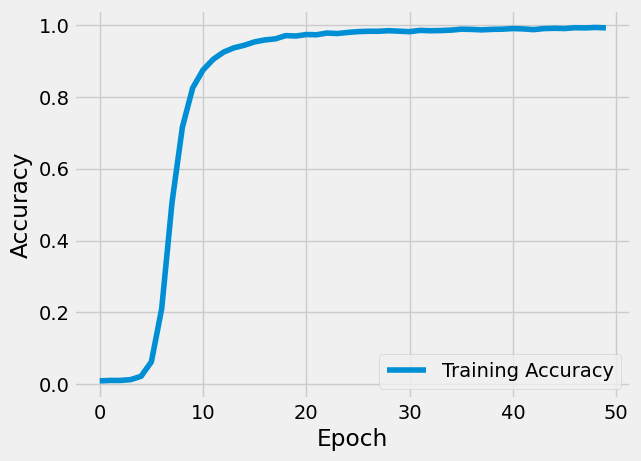

In [23]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()